# import  needed libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('setup com')

setup com


# load data

In [2]:
 
heart_data=pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_data.csv')
heart_data.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0


# Data exploration and processing

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#checking null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#getting statistical summary
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Uni-variate analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

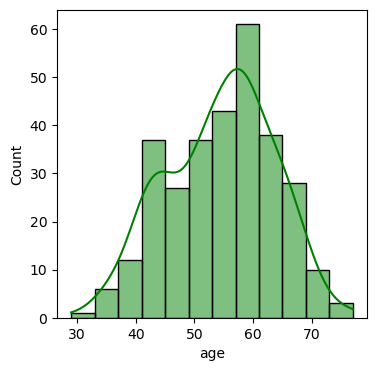

In [6]:
plt.figure(figsize=(4,4))
sns.histplot(x='age',kde=True,color='g',data=heart_data)

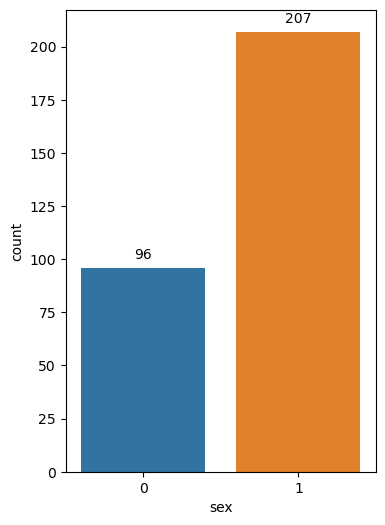

In [7]:
#No of each gender 
plt.figure(figsize=(4,6))
splot=sns.countplot(x='sex',data=heart_data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [8]:
#No of categories in cp column and value counts
print('The no of categories of cp are' ,heart_data.cp.nunique())
print(heart_data.cp.value_counts())

The no of categories of cp are 4
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


[(20.0, 150.15)]

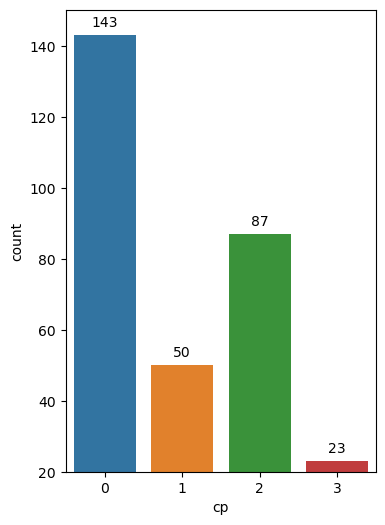

In [9]:
#No of each cp category 
plt.figure(figsize=(4,6))
splot=sns.countplot(x='cp',data=heart_data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
splot.set(ylim=(20, None))

In [10]:
heart_data.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [11]:
heart_data.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [12]:
heart_data.chol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [13]:
heart_data.chol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [14]:
print(heart_data.fbs.unique())
print(heart_data.fbs.value_counts())

[1 0]
0    258
1     45
Name: fbs, dtype: int64


[(20.0, 270.9)]

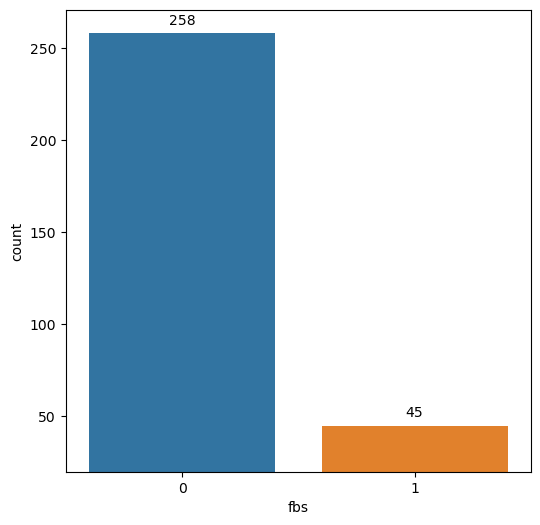

In [29]:
#No of each fbs category 
plt.figure(figsize=(6,6))
fbsplot=sns.countplot(x='fbs',data=heart_data)
for p in fbsplot.patches:
    fbsplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
fbsplot.set(ylim=(20, None))

In [16]:
print(heart_data.restecg.unique())
print(heart_data.restecg.value_counts())

[0 1 2]
1    152
0    147
2      4
Name: restecg, dtype: int64


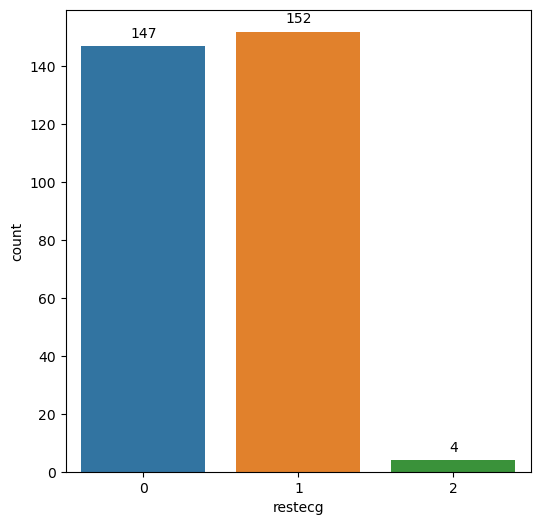

In [28]:
#No of each restecg category 
plt.figure(figsize=(6,6))
rstplot=sns.countplot(x='restecg',data=heart_data)
for p in rstplot.patches:
    rstplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [19]:
heart_data.thalach.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [20]:
print(heart_data.exang.unique())
print(heart_data.exang.value_counts())

[0 1]
0    204
1     99
Name: exang, dtype: int64


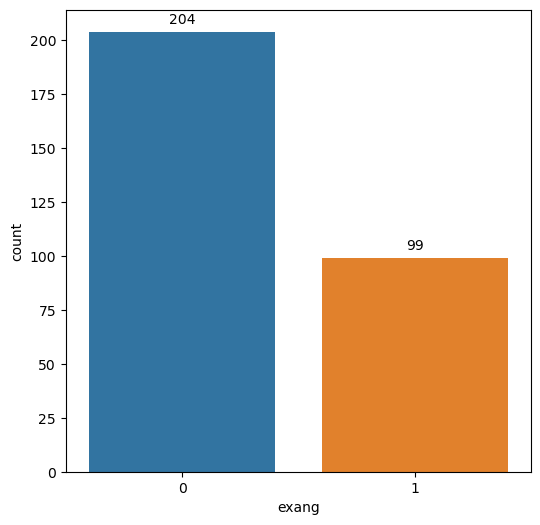

In [21]:
#No of each exang category 
plt.figure(figsize=(6,6))
exgplot=sns.countplot(x='exang',data=heart_data)
for p in exgplot.patches:
    exgplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

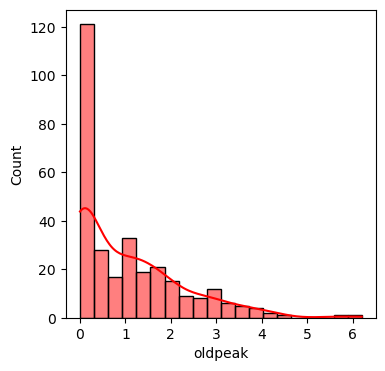

In [24]:
plt.figure(figsize=(4,4))
sns.histplot(x='oldpeak',kde=True,color='r',bins=20,data=heart_data)

In [25]:
print(heart_data.slope.unique())
print(heart_data.slope.value_counts())

[0 2 1]
2    142
1    140
0     21
Name: slope, dtype: int64


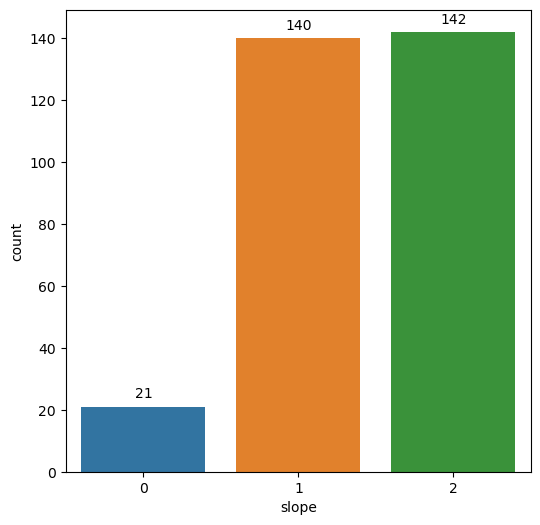

In [27]:
#No of each slope category 
plt.figure(figsize=(6,6))
slpplot=sns.countplot(x='slope',data=heart_data)
for p in slpplot.patches:
    slpplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [31]:
print(heart_data.ca.unique())
print(heart_data.ca.value_counts())

[0 2 1 3 4]
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


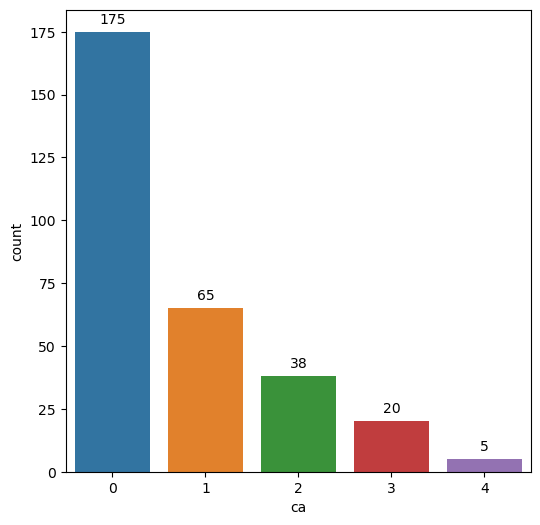

In [32]:
#No of each ca category 
plt.figure(figsize=(6,6))
caplot=sns.countplot(x='ca',data=heart_data)
for p in caplot.patches:
    caplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [33]:
print(heart_data.thal.unique())
print(heart_data.thal.value_counts())

[1 2 3 0]
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


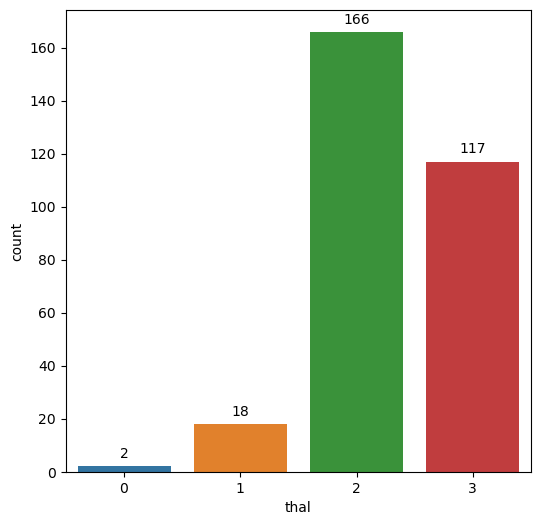

In [36]:
#No of each thal category 
plt.figure(figsize=(6,6))
thlplot=sns.countplot(x='thal',data=heart_data)
for p in thlplot.patches:
    thlplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [37]:
print(heart_data.target.unique())
print(heart_data.target.value_counts())

[1 0]
1    165
0    138
Name: target, dtype: int64


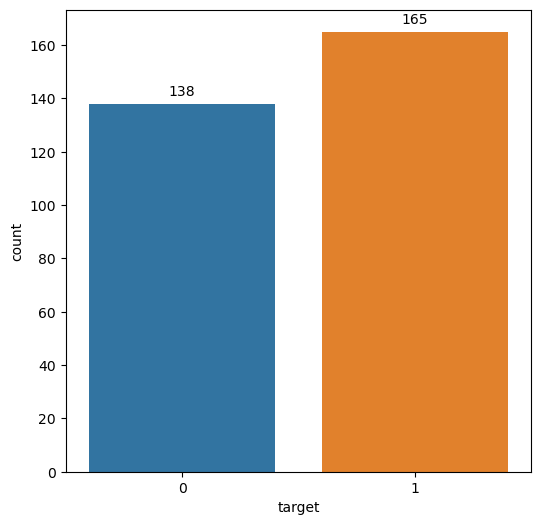

In [38]:
#No of each target category 
plt.figure(figsize=(6,6))
trgplot=sns.countplot(x='target',data=heart_data)
for p in trgplot.patches:
    trgplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Bi-variate analysis

In [39]:
heart_data.sample(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


In [40]:
corr=heart_data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

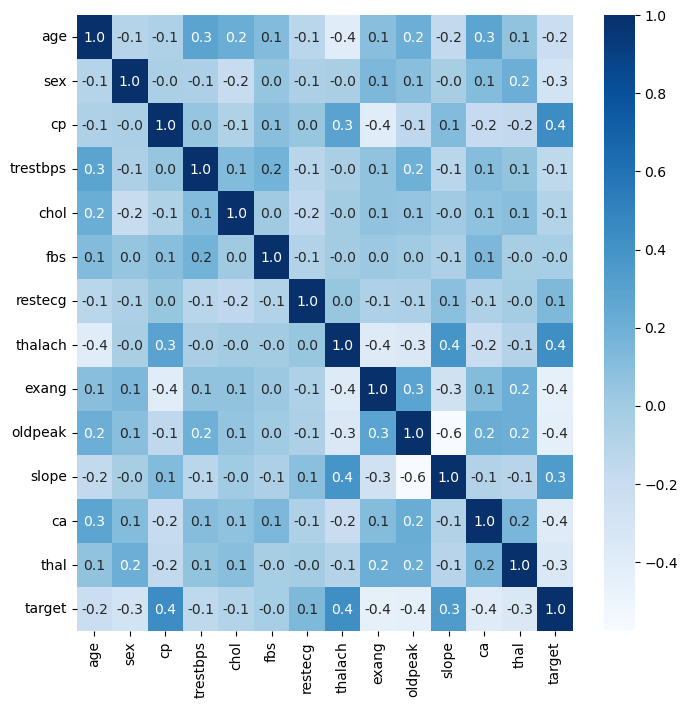

In [42]:
#heatmap for corr b/n variables
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,fmt='.1f',cmap='Blues')

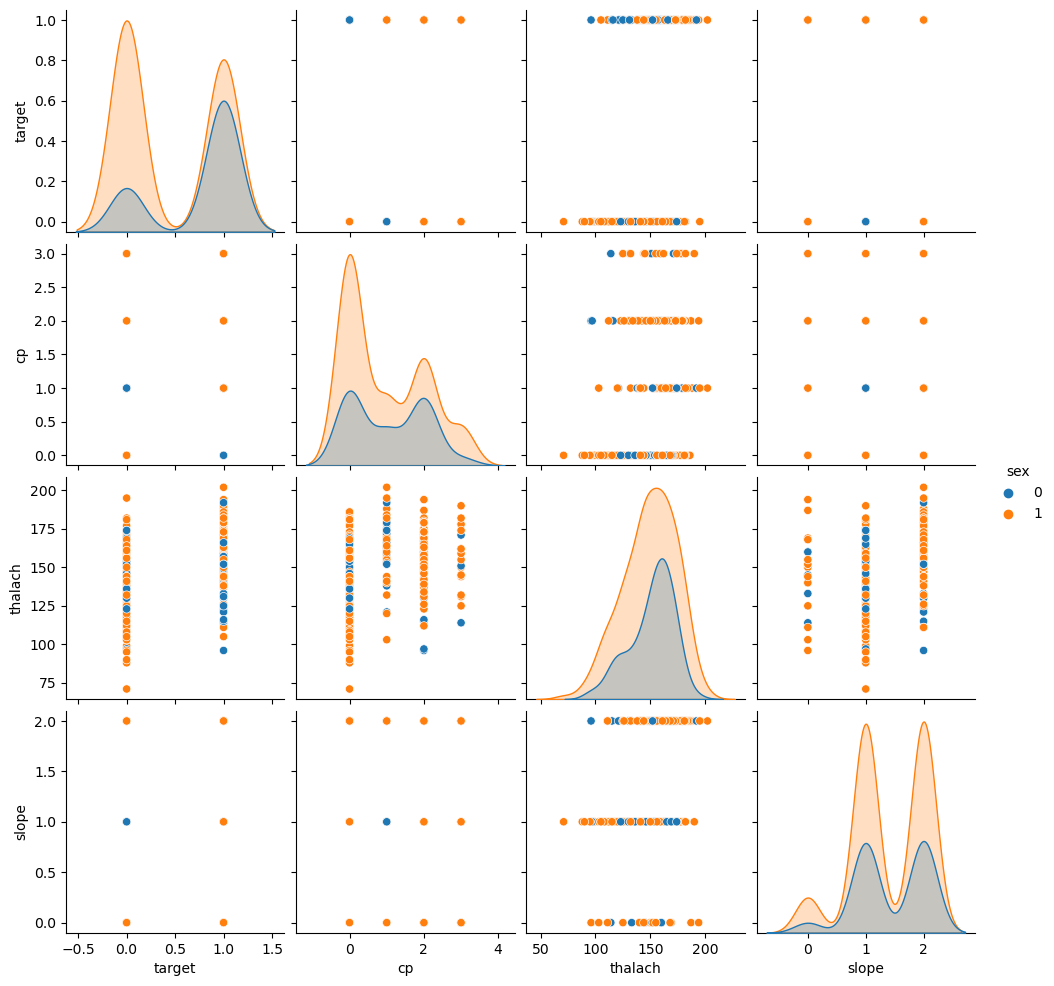

In [46]:
#pairplot b/n target and most features have effect
sns.pairplot(heart_data,
             vars=['target','cp',
                   'thalach','slope'],
            hue='sex')
plt.show()

# Discovering Groupby 

In [52]:
heart_data.groupby(['sex','cp']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex cp                                                         
0   0   57.256410  138.589744  267.538462  145.282051  1.356410
    1   51.944444  128.055556  251.444444  162.833333  0.461111
    2   54.971429  127.885714  261.057143  151.800000  0.474286
    3   63.250000  147.500000  247.000000  149.500000  1.575000
1   0   55.105769  129.557692  243.605769  138.759615  1.393269
    1   51.031250  128.593750  241.031250  162.187500  0.234375
    2   52.538462  132.057692  231.134615  158.173077  1.015385
    3   54.315789  139.473684  235.052632  157.315789  1.352632

In [53]:
heart_data.groupby(['sex','fbs']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex fbs                                                         
0   0    55.238095  131.369048  257.797619  152.333333  0.828571
    1    58.750000  145.083333  285.833333  142.666667  1.208333
1   0    53.264368  129.821839  240.270115  148.471264  1.137356
    1    56.363636  136.878788  234.121212  151.545455  1.000000

In [54]:
heart_data.groupby(['sex','restecg']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex restecg                                                         
0   0        56.250000  134.772727  281.136364  150.750000  1.095455
    1        54.775510  130.571429  244.612245  153.306122  0.600000
    2        62.000000  149.333333  243.000000  121.000000  2.166667
1   0        55.446602  133.708738  244.038835  146.689320  1.186408
    1        52.029126  128.349515  233.776699  151.320388  1.012621
    2        58.000000  114.000000  318.000000  140.000000  4.400000

In [55]:
heart_data.groupby(['sex','exang']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex exang                                                         
0   0      55.581081  129.743243  257.972973  152.500000  0.783784
    1      56.000000  144.318182  272.500000  146.500000  1.186364
1   0      52.715385  131.400000  235.807692  157.492308  0.820000
    1      55.519481  130.181818  245.168831  134.558442  1.614286

In [56]:
heart_data.groupby(['sex','slope']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex slope                                                         
0   0      58.400000  158.400000  224.600000  142.400000  3.560000
    1      55.822222  133.444444  258.711111  144.800000  1.108889
    2      55.239130  129.978261  267.826087  158.260870  0.356522
1   0      54.437500  133.562500  241.750000  145.687500  2.450000
    1      56.231579  131.463158  244.578947  136.684211  1.580000
    2      51.197917  130.000000  233.645833  161.656250  0.433333

In [57]:
heart_data.groupby(['sex','ca']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex ca                                                         
0   0   53.156250  130.390625  256.265625  152.625000  0.668750
    1   58.533333  129.400000  271.200000  148.866667  0.400000
    2   62.538462  145.538462  271.230769  152.923077  1.707692
    3   63.000000  149.500000  272.500000  129.750000  3.275000
1   0   50.774775  131.036036  234.873874  156.351351  0.933333
    1   57.160000  129.700000  241.200000  138.760000  1.198000
    2   58.360000  130.600000  245.720000  142.720000  1.708000
    3   59.125000  133.750000  263.687500  135.750000  1.512500
    4   45.800000  134.200000  208.000000  160.400000  0.100000

In [58]:
heart_data.groupby(['sex','thal']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex thal                                                         
0   0     53.000000  128.000000  216.000000  115.000000  0.000000
    1     58.000000  170.000000  225.000000  146.000000  2.800000
    2     55.012658  130.329114  254.759494  153.949367  0.635443
    3     59.200000  145.466667  301.200000  139.000000  2.073333
1   0     52.000000  128.000000  204.000000  156.000000  1.000000
    1     56.588235  135.000000  227.117647  134.470588  1.447059
    2     51.643678  128.528736  238.137931  157.425287  0.725287
    3     55.107843  132.362745  242.647059  144.088235  1.394118

In [59]:
heart_data.groupby(['sex','target']).agg({'age': 'mean', 'trestbps': 'mean','chol':'mean','thalach':'mean','oldpeak':'mean'})

age    trestbps        chol     thalach   oldpeak
sex target                                                         
0   0       59.041667  146.125000  274.958333  142.416667  1.841667
    1       54.555556  128.736111  256.750000  154.027778  0.554167
1   0       56.087719  131.929825  246.061404  138.403509  1.531579
    1       50.903226  129.741935  230.989247  161.903226  0.605376